# Numpy : 数値計算

In [1]:
import numpy as np

In [3]:
x = np.array([1,2,3])

In [4]:
x

array([1, 2, 3])

In [9]:
y = np.array([2,3.9,6.1])

In [6]:
y

array([2. , 3.1, 4.9])

# データの中心化

データの中心化を行うには平均を引いてあげる

In [7]:
# 平均の算出
x.mean()

2.0

In [10]:
y.mean()

4.0

In [13]:
# 中心化
xc = x - x.mean()

In [14]:
xc

array([-1.,  0.,  1.])

In [15]:
yc = y - y.mean()

In [16]:
yc

array([-2. , -0.1,  2.1])

# パラメータaの計算

In [17]:
# 要素ごとの掛け算（要素積）
x * x

array([1, 4, 9])

In [18]:
x

array([1, 2, 3])

In [26]:
xx = xc * xc

In [24]:
xy = xc * yc

In [27]:
xx.sum()

2.0

In [28]:
xy.sum()

4.1

In [29]:
a = xy.sum() / xx.sum()

In [30]:
a

2.05

# Pandas : データベースの操作（CSVやSQLなど）

In [31]:
import pandas as pd

In [34]:
# CSVファイルの読み込み
df = pd.read_csv('sample.csv')

In [39]:
# df = データフレーム（よく使う）
df.head(3)

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0


In [42]:
# データの抽出
x = df['x']
y = df['y']

# Matplotlib : グラフの描画

In [43]:
import matplotlib.pyplot as plt

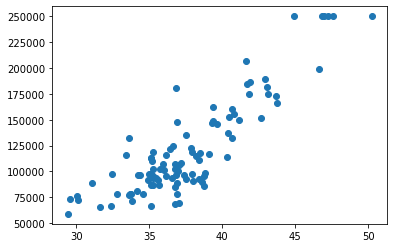

In [45]:
# 横軸x 縦軸y 散布図をプロット
plt.scatter(x,y)
plt.show()

# 単回帰分析の実装

## データの中心化

In [46]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [47]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [49]:
df_c = df - df.mean()

In [50]:
df_c.head(3)

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0


In [51]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,1.989520e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [52]:
# データの抽出
x = df_c['x']
y = df_c['y']

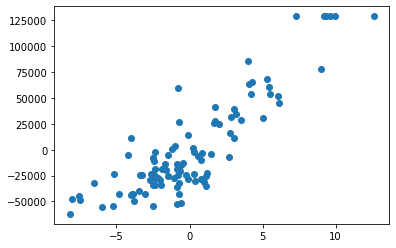

In [54]:
# xとyの散布図をプロット
plt.scatter(x,y)
plt.show()

## パラメータaの計算

In [55]:
xx = x * x

In [56]:
xy = x * y

In [57]:
a = xy.sum() / xx.sum()

In [58]:
a

10069.022519284063

## プロットして確認

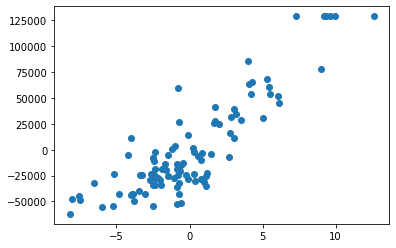

In [59]:
plt.scatter(x,y)

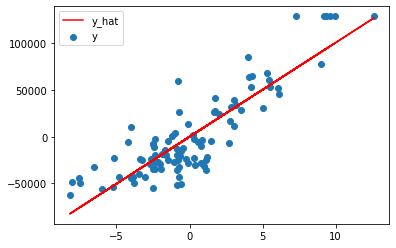

In [63]:
plt.scatter(x,y, label='y') # 実測値
plt.plot(x, a*x, label='y_hat', color="red") # 予測値
plt.legend() # 凡例の表示
plt.show()

## 予測値の計算

In [64]:
x_new = 40 #　40平米の部屋

In [69]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [67]:
mean = df.mean()

In [68]:
mean['x']

37.62222

In [70]:
# 中心化
xc = x_new - mean['x']

In [72]:
xc

2.3777800000000013

In [75]:
# 単回帰分析による予測
yc = a * xc

In [76]:
yc

23941.920365903272

In [77]:
# 元のスケールの予測値
y_hat = yc + mean['y']

In [78]:
y_hat

145006.92036590326

# 予測値を計算する関数の作成

In [82]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.00000
    
    # 中心化
    xc = x - xm
    
    # 予測値の計算
    y_hat = a * xc + ym
    
    return y_hat

In [86]:
predict(40)

145006.92036590326

In [88]:
predict(25) # 外挿の範囲なのでマイナスになってしまう

-6028.417423357663